<a href="https://www.kaggle.com/code/sanphats/covid19-vaccination-progress-sea?scriptVersionId=107215117" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Covid-19 Vaccinate progression in Southeast Asia** 🧑💉
---
**Context:** Data is collected daily from Our World in Data GitHub repository for covid-19, merged and uploaded. Country level vaccination data is gathered and assembled in one single file. Then, this data file is merged with locations data file to include vaccination sources information. A second file, with manufacturers information, is included.

---
**outline**
- [Preprocess data](#1)
- [Questions to explore](#2)
- [The world most popular vaccine](#3)
- [Total fully vaccination in SEA](#4)
- [Vaccination rate in SEA](#5)
- [Daily vaccination rate in SEA](#6)
- [Prophet Model (Bonus for Indonesia)](#7)

<a id='1'></a>
## **Preprocessing data**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.rc('font', size=10)  
%matplotlib inline

In [2]:
# import dataset from CSV
vac = '../input/covid-world-vaccination-progress/country_vaccinations.csv'
manu = '../input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv'
df_vac = pd.read_csv(vac, parse_dates= ['date'])
df_manu = pd.read_csv(manu, parse_dates = [])
df_manu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            35623 non-null  object
 1   date                35623 non-null  object
 2   vaccine             35623 non-null  object
 3   total_vaccinations  35623 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [3]:
df_vac.tail(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86511,Zimbabwe,ZWE,2022-03-29,9039729.0,5053114.0,3510256.0,105369.0,103751.0,59.90,33.48,23.26,6874.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [4]:
df_manu.head()

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481
4,Argentina,2020-12-30,Moderna,2


In [5]:
# Check how many SEA countries in dataset
sea = ['Brunei', 'cambodia', 'India', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'] # 11 countries
df_vac[df_vac['country'].isin(sea)]['country'].unique() # 10 countries

array(['Brunei', 'India', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar',
       'Philippines', 'Singapore', 'Thailand', 'Vietnam'], dtype=object)

---
<a id='2'></a>
# **Questions to explore** ❓

## **Region ; Entire world**
1.  **The most popular vaccine**  (No total vaccination data in SEA countries 😞)

## **Region ; Southeast Asia** 
❌ Remove **Cambodia** out since there is no data 


2.   **The list of SEA countries which have the highest percentage of fully vaccinated people**
3.   **The vaccination rate in SEA countries over time**
4.   **The daily vaccination rate in SEA countries over time**
---




<a id='3'></a>
# **The most popular vaccine**  

In [6]:
# the most popular vaccine 
most_vac = df_manu.groupby(['vaccine'])[['location','date', 'total_vaccinations']].sum().sort_values(by = 'total_vaccinations', ascending = False)
most_vac['Total_vac_per_million'] = round(most_vac['total_vaccinations']/1000000,2)
most_vac['Percent_of_total_vac'] = round(100* most_vac['total_vaccinations']/most_vac['total_vaccinations'].sum(),2)
most_vac.reset_index(inplace = True)
most_vac

,vaccine,total_vaccinations,Total_vac_per_million,Percent_of_total_vac
0,Pfizer/BioNTech,344835955037,344835.96,64.18
1,Moderna,103072147621,103072.15,19.18
2,Oxford/AstraZeneca,46451509497,46451.51,8.65
3,Sinovac,13407163275,13407.16,2.50
4,Johnson&Johnson,12611375881,12611.38,2.35
5,Sinopharm/Beijing,10877006517,10877.01,2.02
6,Sputnik V,5787343199,5787.34,1.08
7,CanSino,271397675,271.40,0.05
8,Novavax,8268113,8.27,0.00
9,Covaxin,3572,0.00,0.00


In [7]:
# Let's plot this for easy visualization
fig = px.bar(most_vac[:7], x="Percent_of_total_vac", y="vaccine", template = 'simple_white',
              width=1000, height=400 , orientation = 'h', color = "vaccine",
             color_discrete_sequence=px.colors.diverging.Spectral, text_auto=True,
             labels=dict(Percent_of_total_vac ="Total vaccination (%)", vaccine="Vaccine")).update_xaxes(categoryorder = "total descending")
fig.update_layout(
    title="<b>The world most popular vaccine</b>",
    font=dict(
        size=14,
        color="black"), showlegend = False
)
fig.show()

#### 🔥 The most popular vaccine people taken in the world is **Pzifer/BioNTech** with almost **345,000 million people (64% of total vaccinations)**


**Top 5 Vaccines** 


1.   Pzifer
2.   Moderna
3.   AstraZeneca
4.   Sinovac
5.   Johnson&Johnson

---

<a id='4'></a>
# **The list of SEA countries which have the highest percentage of fully vaccinated people**

In [8]:
# The list of SEA countries which have the highest percentage of fully vaccinated people
sea = ['Brunei', 'India', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']
df_vac_sea = df_vac[df_vac['country'].isin(sea)]
df_vac_sea_group = df_vac_sea.groupby(['country'])[['date','people_fully_vaccinated_per_hundred']].max().sort_values(by = 'people_fully_vaccinated_per_hundred' ,ascending = False)
df_vac_sea_group

,date,people_fully_vaccinated_per_hundred
country,,
Brunei,2022-03-18,91.71
Singapore,2022-03-28,91.04
Vietnam,2022-03-22,79.20
Malaysia,2022-03-29,78.72
Thailand,2022-03-29,71.71
Laos,2022-03-28,60.38
India,2022-03-29,59.44
Philippines,2022-03-29,59.26
Indonesia,2022-03-29,57.47


In [9]:
df_vac_sea_group['iso_alpha'] = ["BRN","SGP","VNM", "MYS","THA","LAO","IND", "PHL", "IDN","MMR"]

In [10]:
fig = px.bar(df_vac_sea_group, x= "people_fully_vaccinated_per_hundred", y= df_vac_sea_group.index, template = 'simple_white',
              width=1000, height=500 , orientation = 'h', color = df_vac_sea_group.index,
             color_discrete_sequence=px.colors.sequential.Plotly3, text_auto=True,
             labels=dict(people_fully_vaccinated_per_hundred ="Fully vaccinated people (%)")).update_xaxes(categoryorder = "total descending")
fig.update_layout(
    title="<b>SEA total fully vaccinated people (%)</b>",
    font=dict(
        size=14,
        color="black"),
    showlegend = False
)
fig.show()

In [11]:
fig = px.choropleth(df_vac_sea_group, locations="iso_alpha",
                    color="people_fully_vaccinated_per_hundred", 
                    width=900, height=600,
                    hover_name=df_vac_sea_group.index, # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plotly3[::-1],
                    labels=dict(people_fully_vaccinated_per_hundred ="Total fully vaccinated people(%)"))

fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(height=400,margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### 🔥🔥 The **SEA countries** which have the highest percentage of fully vaccinated people are **Brunei and Singapore** with almost **92%**. Also, these are only **2 SEA countries which have reached > 80% of fully vaccinated people.**
---
**Top 5 SEA countries with highest percentage of fully vaccinated people** 
1. Brunei
2. Singapore
3. Vietnam
4. Malaysia
5. Thailand 😞

---

<a id='5'></a>
# **The vaccination rate in SEA countries over time**

In [12]:
fig = px.line(df_vac_sea, x = 'date', y='people_fully_vaccinated_per_hundred', color = 'country', template="simple_white",
              width = 900, height = 500)
 
fig.update_layout(
    title="<b>Vaccination rate in SEA countries (%)</b>",
    xaxis_title="Month",
    yaxis_title="Fully vaccinated people (%)",
    font=dict(
        size=14,
        color="black")
)
fig.update_traces(connectgaps=True)
fig.show()

#### 🔥🔥🔥 **Interesting points from Vaccination rate**


*   **Singapore** was the earliest SEA country to start the vaccination and was the first SEA country reaching 80% of vaccination rate
    * Start Vaccination around February 2021 
    * Reach 80% vaccination rate in October 2021
*   **Brunei** started Vaccination in around April together with the rest SEA countries and reached 80% and claimed the most vaccination SEA country in December 2021. 
*   **Malaysia** and **Vietnam** were about to reach 80% of vaccination rate.
---


<a id='6'></a>
# **The daily vaccination rate in SEA countries over time**

Select only top 3 Vaccination rate which are
- Brunei
- Singapore
- Vietnam

In [13]:
# check NULL values in daily_vaccination data
df_vac_daily = df_vac_sea[['country','date', 'daily_vaccinations_per_million']]
top = ['Brunei', 'Singapore', 'Vietnam']
df_vac_daily = df_vac_daily[df_vac_daily['country'].isin(top)]
df_vac_daily.daily_vaccinations_per_million.isna().sum()
df_vac_daily[df_vac_daily['daily_vaccinations_per_million'].isna()]


,country,date,daily_vaccinations_per_million
11395,Brunei,2021-04-02,NaN
69775,Singapore,2020-12-30,NaN
84250,Vietnam,2021-03-07,NaN


In [14]:
# Fill NULL values with back values close to that NULL
df_vac_daily['daily_vaccinations_per_million'].fillna(method = 'bfill', inplace =True)
df_vac_daily.daily_vaccinations_per_million.isna().sum()

0

In [15]:
# Creating the Figure instance
fig = px.line(df_vac_daily, x= 'date' , y= 'daily_vaccinations_per_million', color = 'country', template="simple_white",
              width = 900, height = 500)
 
fig.update_layout(
    title="<b>Interactive daily vaccination rate</b>",
    xaxis_title="Month",
    yaxis_title="Daily vaccination (per Million)",
    font=dict(
        size=14,
        color="black")
)
fig.show()

#### 🔥🔥🔥 **Interesting points from daily vaccination rate**


*   The highest vaccinations per day in Brunei, Singapore and Vietnam were approximately 18000, 15000 and 17000 million of people, respectively
*   Singapore's daily vaccination rate was in a **downtrend** after August 2021 while Brunei and Vietnam started an obvious downtrend around end of 2021

---

<a id='7'></a>
# **Prophet Model (Bonus for Indonesia)** 🎁

Prophet is an open source forecasting time-series tool developed by Facebook Core Data Science team. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

More information can be found [here](https://facebook.github.io/prophet/)

---
Since we can see a constant uptrend of **Indonesia** vaccination rate.

Let's try apply prophet model to predict when Indonesia would reach 80% of vaccination rate.

In [16]:
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 231.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9434177 sha256=16f3bfc3830488ffcaaa2de2051971007d30e80f1fd2c20652ef3726bf4da308
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.4
    Uninstalling cmdstanpy-1.0.4:
      Successfully uninstalled cmdstanpy-1.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1 requires cmdstanpy>=1.0.1, but you have cmdstanpy 0.9.5 which is incompatible.


In [17]:
# Fill NULL using interpolate
df_in = df_vac_sea[df_vac_sea['country'] == 'Indonesia'][['date','people_fully_vaccinated_per_hundred']]
df_in['people_fully_vaccinated_per_hundred']= df_in['people_fully_vaccinated_per_hundred'].interpolate()
df_in = df_in.rename(columns={'people_fully_vaccinated_per_hundred': 'y', 'date':'ds'})

Initial log joint probability = -9.21709
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2004.49     0.0205293       12378.7           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2190.64   0.000544215       1072.99           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2269.61    0.00191374       1990.24           1           1      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        2285.1    0.00265779       6483.06      0.6832      0.6832      480   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2301.12    0.00170176       2549.75           1           1      593   
    Iter      log prob        ||dx||      ||grad||       alpha  

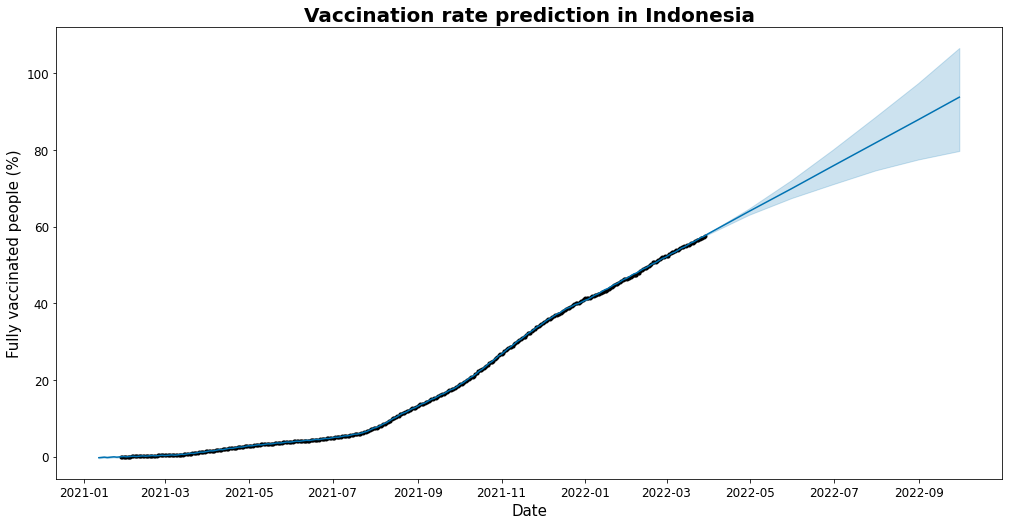

In [18]:
# Initialise the model and make predictions
m = Prophet()
m.fit(df_in)

future = m.make_future_dataframe(periods= 7, freq='M')

forecast = m.predict(future)

# Visualise the prediction
fig = m.plot(forecast,figsize=(14, 7))
ax = fig.gca()
ax.set_title("Vaccination rate prediction in Indonesia", size=20,fontweight="bold")
ax.set_xlabel("Date", size=15)
ax.set_ylabel("Fully vaccinated people (%)", size=15)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
plt.grid(False)

fig.show()

#### 🔥🔥🔥 **Interesting points from prophet prediction**
- Indonesia possibly reachs 80% of vaccination rate around July 2022 to September 2022.

---

Thank you for reading :)
SANPHAT S.